<a href="https://colab.research.google.com/github/JonRivera/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

In [0]:
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)

sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [0]:
sample1_mean = sample1['ConvertedSalary'].mean()
sample2_mean = sample2['ConvertedSalary'].mean()
print(sample1_mean,sample2_mean)

55752.2 68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

RESPONSE:
I would trust the sample2 mean more, as the sample size was bigger. Having a bigger sample size implies a lower margin of error. This would suggest a confidence interval closer to the population parameter.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

RESPONSE: The sample mean doesn't directly indicated how much sampling error there might be. Based on a static, stanard deviation and sample size we can then determine the margin or erro.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



RESPONSE: We could provide graphical representation comparing the confidence intervals. We could further explain the confidence intervals by elaborating on the sample size, p value, and static values obtained. 

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
from scipy import stats

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1) #default population
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)

#confidence interval for sample means 1
confidence_interval(sample1['ConvertedSalary'])

In [0]:
  #confidence interval for sample mean 2
confidence_interval(sample2['ConvertedSalary'])

In [0]:
# First compute confidence Interval with sample size of 20
CI1 = confidence_interval(sample1['ConvertedSalary'])
#Do the sam efor the second sample size of 200
CI2 =  confidence_interval(sample2['ConvertedSalary'])

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size, the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [0]:
#compute margin of error for sample mean1
print("Converted Salary")
print("Mean:", CI1[1])
print("MOE:", CI1[2]-CI1[1])

Converted Salary
Mean: 55752.2
MOE: 19947.096903744634


In [0]:
#compute margin of error for sample means2
print("Converted")
print("Mean:", CI2[1])
print("MOE:", CI2[2]-CI2[1])

Census Responder Age Estimate 1
Mean: 68551.255
MOE: 7958.196195520912


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

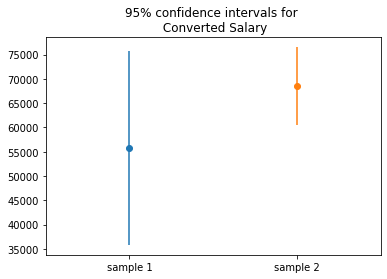

In [0]:
import matplotlib.pyplot as plt
# plt.errorbar
plt.errorbar(x=0, y=CI1[1], yerr=(CI1[2]-CI1[1]), fmt='o')
plt.errorbar(x=1, y=CI2[1], yerr=(CI2[2]-CI2[1]), fmt='o')
plt.title('95% confidence intervals for \n Converted Salary')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()



**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

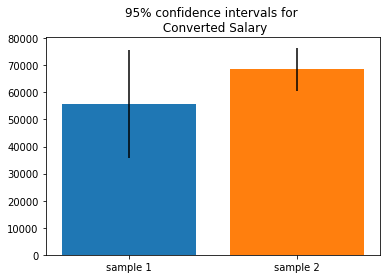

In [0]:
# pltbar
plt.bar(x=0, height=CI1[1], yerr=(CI1[2]-CI1[1]))
plt.bar(x=1, height=CI2[1], yerr=(CI2[2]-CI2[1]))
plt.title('95% confidence intervals for \n Converted Salary')
plt.xticks(ticks=[0,1], labels=['sample 1', 'sample 2'])
plt.xlim(-.5, 1.5)
plt.show()

PLT. BAR EXPLANTIONs: 

The plt. error bar shows us that the first sample has a wide confidence interval. Given it had a smaller sample size it compensates for lack of information/data and provides us a bigger confidence interval of where the population parameter might fall under. Sample 2, is the opposite, we have more data, so we have less margin of error and more certainty of where the confidence interval might be. 

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [0]:
#first determine population size
df['ConvertedSalary'].shape
#population size is 2761
def confidence_interval1(data, confidence= .95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # POP Standard Deviation
  s = np.std(sample)
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)


In [0]:
#Compute confidence interval using function
CI3 = confidence_interval1(df['ConvertedSalary'])

In [0]:
print("Converted")
print("Mean:", CI3[1])
print("MOE:", CI3[2]-CI3[1])

Converted
Mean: 73453.40420137631
MOE: 2153.184304834009


Sample 2 got the closest having a mean of 68551, and a upper bound of 75606.
Mean: 68551.255
MOE: 7958.196195520912

In contrast the population mean is 73453 with a MOE of 2153

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

In [0]:
Precision refers a set of measurements being very reproducible. 
Accuracy on the other hand refers to how close your are to a given value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

It gives us an estimated range of values of where the population parameter might be. In other words, it means that 95% of the caluclated confidence intervals produce from x amount of study times will contain the true population parameter.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [80]:
#Problem#2

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

columns1 = ['party', 'handicapped-infants','water-project-cost-sharing',
          'adoption-of-the-budget-resolution','physician-fee-freeze', 'el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban',
          'aid-to-nicaraguan-contras','mx-missile','immigration',
           'synfuels-corporation-cutback','education-spending',
           'superfund-right-to-sue','crime','duty-free-exports',
           'export-administration-act-south-africa']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names = columns1)
print(df.shape)
print(df.head(), df.tail())


(435, 17)
        party  ... export-administration-act-south-africa
0  republican  ...                                      y
1  republican  ...                                      ?
2    democrat  ...                                      n
3    democrat  ...                                      y
4    democrat  ...                                      y

[5 rows x 17 columns]           party  ... export-administration-act-south-africa
430  republican  ...                                      y
431    democrat  ...                                      y
432  republican  ...                                      y
433  republican  ...                                      y
434  republican  ...                                      n

[5 rows x 17 columns]


In [93]:
#Convert ? to nana, and y,n votes into binary numbers of either 0 or 1
df = df.replace({'?':np.NaN, 'y':1, 'n':0})

#check
print(df.head(), df.isnull().sum(), df['party'].value_counts())

        party  ...  export-administration-act-south-africa
0  republican  ...                                     1.0
1  republican  ...                                     NaN
2    democrat  ...                                     0.0
3    democrat  ...                                     1.0
4    democrat  ...                                     1.0

[5 rows x 17 columns] party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue   

In [97]:
dem = df[df['party'] =='democrat']
df1 = dem.dropna()
bills = list(df1)[1:]
bills

['handicapped-infants',
 'water-project-cost-sharing',
 'adoption-of-the-budget-resolution',
 'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-nicaraguan-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation-cutback',
 'education-spending',
 'superfund-right-to-sue',
 'crime',
 'duty-free-exports',
 'export-administration-act-south-africa']

In [0]:

def confidence_interval(data, confidence=.95):
  # Make sure we're working with a numpy array
  sample = np.array(data)
  # Sample Mean
  x_bar = sample.mean()
  # Sample Standard Deviation
  s = np.std(sample, ddof=1) #default population
  # Sample Size
  n = len(sample)
  # T statistic - correspond to our confidence level, and our degrees of freedom
  t = stats.t.ppf((1+confidence) / 2, n-1)
  # Standard Error
  std_err = s / np.sqrt(n)
  # Margin of Error
  moe = std_err * t
  # Lower and Upper Bound
  upper = x_bar + moe
  lower = x_bar - moe

  return (lower, x_bar, upper)







In [101]:
CI = []
for bill in bills:
  confidence = confidence_interval(df1[bill])
  CI.append(list(confidence))
CI

[[0.5008854514528094, 0.5887096774193549, 0.6765339033859004],
 [0.3627917755681809, 0.45161290322580644, 0.540434030883432],
 [0.791966749899413, 0.8548387096774194, 0.9177106694554258],
 [0.01008836071171925, 0.04838709677419355, 0.08668583283666784],
 [0.13000591391201893, 0.20161290322580644, 0.27321989253959394],
 [0.3548790007497182, 0.4435483870967742, 0.5322177734438303],
 [0.6905800506734978, 0.7661290322580645, 0.8416780138426312],
 [0.7637035637475735, 0.8306451612903226, 0.8975867588330717],
 [0.7176672431336555, 0.7903225806451613, 0.862977918156667],
 [0.44320399355877216, 0.532258064516129, 0.6213121354734858],
 [0.41883613678222775, 0.5080645161290323, 0.5972928954758367],
 [0.06919940918552969, 0.12903225806451613, 0.18886510694350256],
 [0.2093085202865504, 0.2903225806451613, 0.3713366410037722],
 [0.26182787733541646, 0.3467741935483871, 0.4317205097613578],
 [0.5092216687100866, 0.5967741935483871, 0.6843267183866877],
 [0.9023566825660085, 0.9435483870967742, 0.98

In [100]:
len(CI)

16

In [0]:
bills
for i, bill in enumerate(CI):
  plt.errorbar(x=i+1, y= bill[1], yerr=(bill[1]-bill[2]), fmt='o', label=bills[i])

plt.xticks(ticks=[0,20])
plt.xlim(0, 17)
plt.title('confidence intervals')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()